In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
%matplotlib inline 

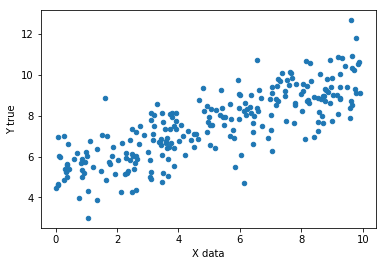

In [9]:
x_data=np.linspace(0,10,1000000)
noise=np.random.randn(len(x_data),)

y_true=(0.5*x_data)+5+noise

x_df=pd.DataFrame(data=x_data,columns=['X data'])
y_df=pd.DataFrame(data=y_true,columns=['Y true'])

my_df=pd.concat([x_df,y_df],axis=1)
my_df.head()

my_df.sample(250).plot(x='X data',y='Y true',kind='scatter')


#plt.plot(x_data,y_true)

In [11]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]

In [12]:
estimator=tf.estimator.LinearRegressor(feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmpnlr_jynv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x182cac8710>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [16]:
from sklearn.model_selection import train_test_split

x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=101)


input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=10,num_epochs=None,shuffle=True)
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=10,num_epochs=1000,shuffle=False)
test_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=10,num_epochs=1000,shuffle=False)

In [17]:
estimator.train(input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmpnlr_jynv/model.ckpt.
INFO:tensorflow:loss = 829.2766, step = 1
INFO:tensorflow:global_step/sec: 965.02
INFO:tensorflow:loss = 39.849136, step = 101 (0.104 sec)
INFO:tensorflow:global_step/sec: 1174.04
INFO:tensorflow:loss = 28.085627, step = 201 (0.085 sec)
INFO:tensorflow:global_step/sec: 1171.99
INFO:tensorflow:loss = 13.786981, step = 301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1129.64
INFO:tensorflow:loss = 20.780777, step = 401 (0.089 sec)
INFO:tensorflow:global_step/sec: 1134.71
INFO:tensorflow:loss = 27.024998, step = 501 (0.088 sec)
INFO:tensorflow:global_step/sec: 1187.68
INFO:tensorflow:loss = 18.335108, step = 601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1169.02
INFO:tensorflow:loss = 11.146683, step = 701 (0.086 sec)
INFO:tensorflow:global_step/sec: 1113.83
INFO:tensorflow:loss = 13.5304, step = 801 (0.090 sec)
INFO:tensorflo

In [18]:
train_metrics=estimator.evaluate(train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-03-12-03:40:16
INFO:tensorflow:Restoring parameters from /var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmpnlr_jynv/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-03-12-03:40:16
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1214184, global_step = 1000, loss = 11.214184


In [19]:
eval_metrics=estimator.evaluate(test_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-03-12-03:40:49
INFO:tensorflow:Restoring parameters from /var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmpnlr_jynv/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-03-12-03:40:50
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1199377, global_step = 1000, loss = 11.199377


In [21]:
pred_input_func=tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)
list(estimator.predict(pred_input_func))

INFO:tensorflow:Restoring parameters from /var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmpnlr_jynv/model.ckpt-1000


[{'predictions': array([4.3370953], dtype=float32)},
 {'predictions': array([5.012759], dtype=float32)},
 {'predictions': array([5.688423], dtype=float32)},
 {'predictions': array([6.3640866], dtype=float32)},
 {'predictions': array([7.0397506], dtype=float32)},
 {'predictions': array([7.715414], dtype=float32)},
 {'predictions': array([8.391078], dtype=float32)},
 {'predictions': array([9.066742], dtype=float32)},
 {'predictions': array([9.742406], dtype=float32)},
 {'predictions': array([10.41807], dtype=float32)}]

In [23]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=pred_input_func):
    predictions.append(x['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmpnlr_jynv/model.ckpt-1000


In [24]:
predictions

[array([4.3370953], dtype=float32),
 array([5.012759], dtype=float32),
 array([5.688423], dtype=float32),
 array([6.3640866], dtype=float32),
 array([7.0397506], dtype=float32),
 array([7.715414], dtype=float32),
 array([8.391078], dtype=float32),
 array([9.066742], dtype=float32),
 array([9.742406], dtype=float32),
 array([10.41807], dtype=float32)]

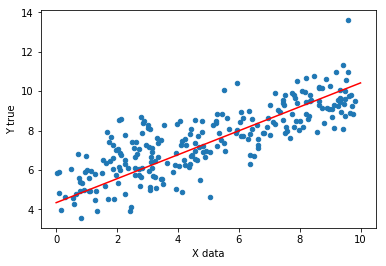

In [29]:
my_df.sample(250).plot(x='X data',y='Y true',kind='scatter')
plt.plot(np.linspace(0,10,10),predictions,'r')